In [99]:
import pandas as pd

In [100]:
df1 = pd.read_csv('Part1 - Normal.csv', usecols=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class'])

In [101]:
df2 = pd.read_csv('Part1 - Type_H.csv', usecols=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class'])

In [102]:
df3 = pd.read_csv('Part1 - Type_S.csv', usecols=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree','Class'])

In [103]:
h=pd.concat([df1,df2,df3],ignore_index=True)

# Data preprocessing and cleaning

In [104]:
h.head(310)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal
...,...,...,...,...,...,...,...
305,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107,Type_S
306,95.480229,46.550053,59.000000,48.930176,96.683903,77.283072,Type_S
307,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216,Type_S
308,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629,Type_S


In [105]:
h.dropna(subset=['Class'], inplace=True)

In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
scaler = StandardScaler()
h.iloc[:, :5] = scaler.fit_transform(h.iloc[:, :5])

In [108]:
h.head(310)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,7.986683,Normal
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,2.001642,Normal
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,4.994195,Normal
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.910941,Normal
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-3.388910,Normal
...,...,...,...,...,...,...,...
305,1.139826,1.641245,1.790676,0.239923,0.577094,100.292107,Type_S
306,2.032901,2.902995,0.381614,0.445948,-1.597243,77.283072,Type_S
307,0.790186,0.128191,1.301073,0.919094,0.788596,73.388216,Type_S
308,1.579575,0.282500,2.261457,1.817689,0.227452,76.730629,Type_S


In [109]:
h.isnull().values.any()

False

In [110]:
import numpy as np
import matplotlib.pyplot as plt       
%matplotlib inline 
import seaborn as sns

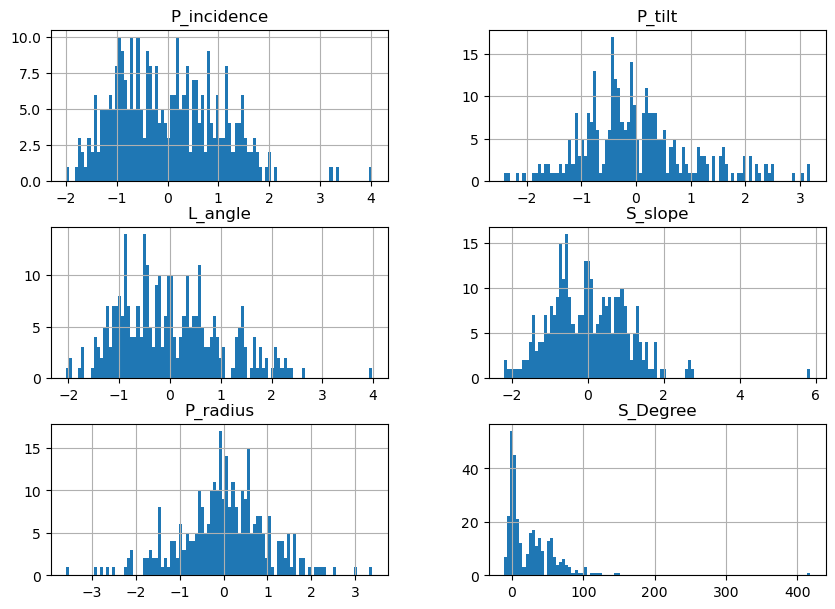

In [111]:
columns = list(h)[0:-1] 
h[columns].hist(stacked=False, bins=100, figsize=(10,25), layout=(10,2)); 

In [112]:
df_without_classification = h.drop(columns=['Class'])

In [113]:
df_without_classification.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,-1.277922,-0.057898,-0.907904,-1.597803,0.730468,7.986683
1,-0.324010,0.142672,-0.017786,-0.522437,0.596124,2.001642
2,-0.937559,-0.860412,-0.271475,-0.562386,0.849889,4.994195
3,-0.707649,-0.009077,-0.212206,-0.901920,0.831811,-0.910941
4,-0.859732,-0.688835,-0.504914,-0.590377,0.921914,-3.388910


In [114]:
df_without_classification.corr()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000


In [115]:
def plot_corr(df, size=8):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

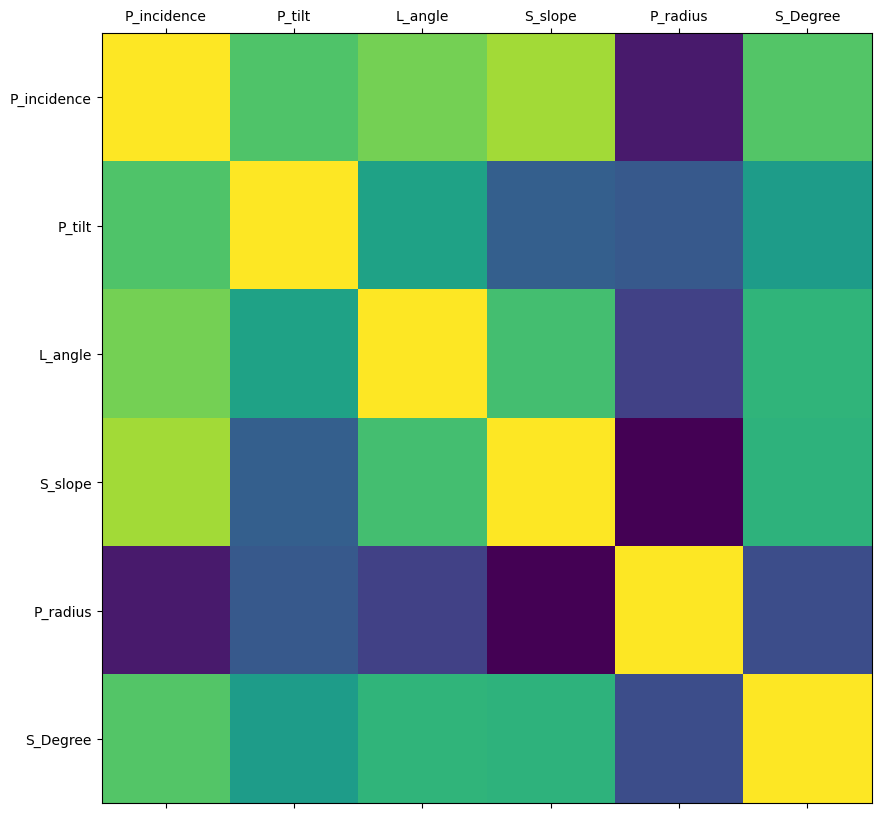

In [116]:
plot_corr(df_without_classification)

/Users/ebinsam/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


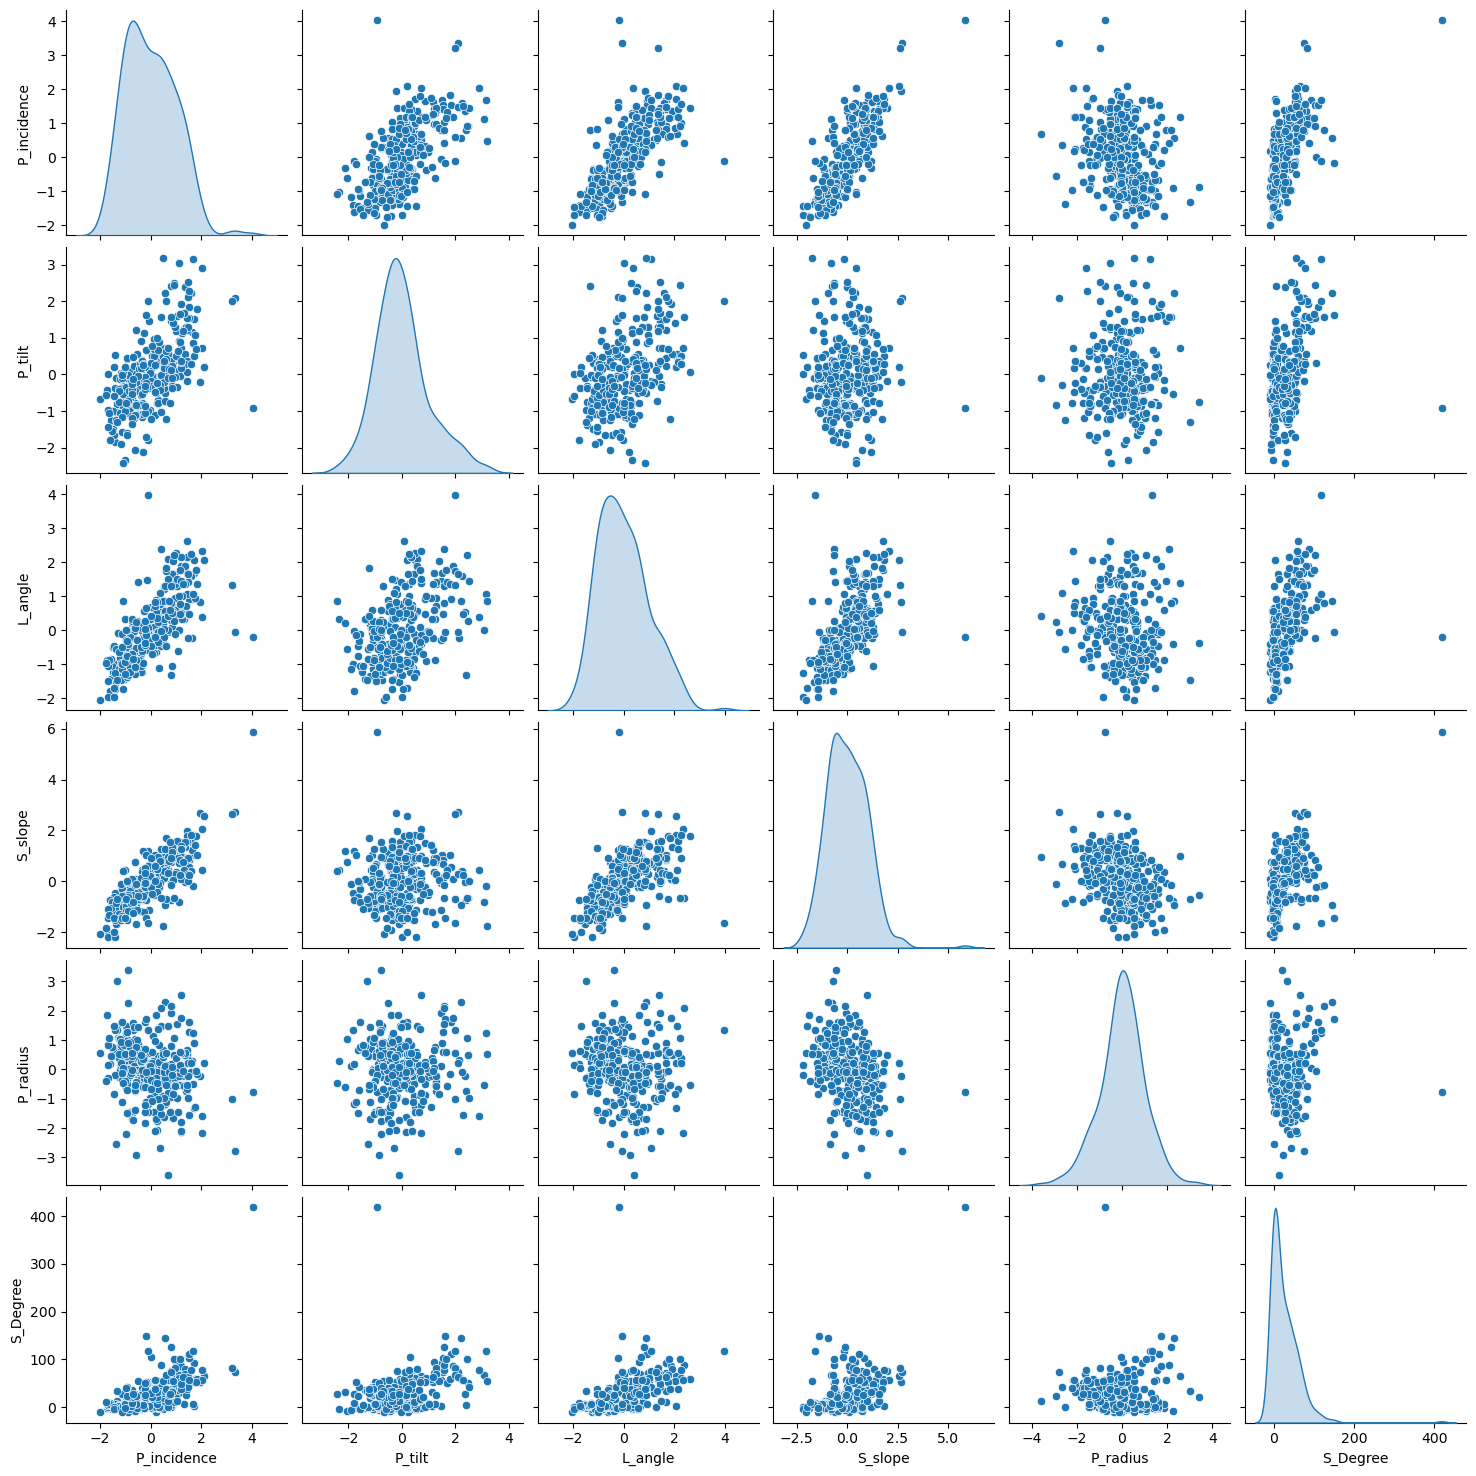

In [117]:
sns.pairplot(h,diag_kind='kde')

In [118]:
from sklearn.model_selection import train_test_split

X = h.drop('Class',axis=1)     # Predictor feature columns (8 X m)
Y = h['Class']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


x_train.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
67,0.305642,-0.433929,-0.428141,0.716012,0.862893,-1.982120
283,0.610464,1.998859,1.760201,-0.706466,0.544799,67.771190
122,0.149747,0.687636,0.111696,-0.320415,-0.864653,15.779697
34,0.146998,0.980109,-0.017594,-0.542014,-0.256775,7.439870
197,0.826564,0.221585,1.662937,0.896171,-0.644114,33.306067


In [119]:
x_test

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
78,0.817515,-0.181993,0.361024,1.185460,-0.940393,0.599247
244,-0.026293,-0.323570,0.329729,0.207492,-0.961876,30.409133
185,-0.874727,-0.764273,-0.374157,-0.553385,3.395818,20.315315
70,-0.604956,-0.411600,-0.943278,-0.469929,0.091304,3.089484
120,-0.963107,-0.336750,-0.761083,-0.985637,1.244021,6.451648
...,...,...,...,...,...,...
5,-1.729051,-0.419114,-0.865218,-1.907770,1.841883,-2.005373
248,0.305603,-0.771599,-0.059816,0.967730,-1.017285,39.307212
38,-0.765718,-0.897617,-0.883750,-0.313986,0.199785,1.630664
258,-0.201152,-1.721056,-0.147533,1.024930,-1.118539,52.165145


In [120]:
x_train

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
67,0.305642,-0.433929,-0.428141,0.716012,0.862893,-1.982120
283,0.610464,1.998859,1.760201,-0.706466,0.544799,67.771190
122,0.149747,0.687636,0.111696,-0.320415,-0.864653,15.779697
34,0.146998,0.980109,-0.017594,-0.542014,-0.256775,7.439870
197,0.826564,0.221585,1.662937,0.896171,-0.644114,33.306067
...,...,...,...,...,...,...
203,-0.622623,-1.108469,0.057712,0.026974,-0.530681,25.335647
255,0.366567,-0.299356,1.087986,0.693908,-2.667339,41.685474
72,-0.395920,-0.409901,-0.558549,-0.202775,-0.301368,2.737035
235,0.966063,1.281708,1.379292,0.284868,-0.549757,82.093607


In [121]:
y_train

67     Normal
283      tp_s
122    Type_H
34      Nrmal
197    Type_S
        ...  
203    Type_S
255    Type_S
72     Normal
235    Type_S
37     Normal
Name: Class, Length: 217, dtype: object

In [122]:
y_test

78     Normal
244    Type_S
185    Type_S
70     Normal
120    Type_H
        ...  
5      Normal
248    Type_S
38     Normal
258    Type_S
112    Type_H
Name: Class, Length: 93, dtype: object

# Logistic regression

In [123]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

#fix the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5  intercept
0  0.223076 -0.748277 -0.036195  0.844369  1.137269 -0.122368  -0.011364
1  0.117746  0.044400  0.739530  0.118092  0.396834 -0.113246  -1.073599
2 -0.129635  0.490095 -0.385465 -0.531881 -0.856185 -0.065216  -1.742942
3  0.346003 -0.166241 -0.552168  0.568250 -0.324384  0.099860  -2.566269
4 -0.090834 -0.213757  0.966487  0.042739 -0.304344 -0.000982  -3.023486
5 -0.248442  0.852297 -0.200180 -0.954500 -0.500712 -0.077798  -2.164016


In [124]:
model_score = model.score(x_test, y_test)
print(model_score)

0.6451612903225806


In [125]:
model_score = model.score(x_train, y_train)
print(model_score)

0.6866359447004609


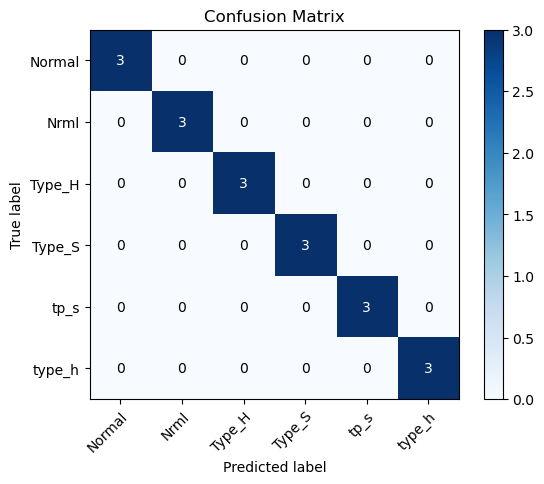

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Example y_true and y_pred
y_true = ["Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h","Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h","Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h"]
y_pred = ["Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h","Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h","Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h"]



# Get unique class labels
classes = unique_labels(y_true, y_pred)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=classes)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Show all ticks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.show()


In [141]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


classifier = SVC(kernel='rbf', C=1)
classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(x_test)

In [142]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6451612903225806
Confusion Matrix:
[[20  0  0  0  0  0]
 [ 7  0  0  1  0  0]
 [13  0  0  0  0  0]
 [ 2  0  0 40  0  0]
 [ 0  0  0  6  0  0]
 [ 4  0  0  0  0  0]]
Classification Report:
              precision    recall  f1-score   support

      Normal       0.43      1.00      0.61        20
       Nrmal       0.00      0.00      0.00         8
      Type_H       0.00      0.00      0.00        13
      Type_S       0.85      0.95      0.90        42
        tp_s       0.00      0.00      0.00         6
      type_h       0.00      0.00      0.00         4

    accuracy                           0.65        93
   macro avg       0.21      0.33      0.25        93
weighted avg       0.48      0.65      0.54        93



/Users/ebinsam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebinsam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ebinsam/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision tree

In [144]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [147]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [148]:
tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

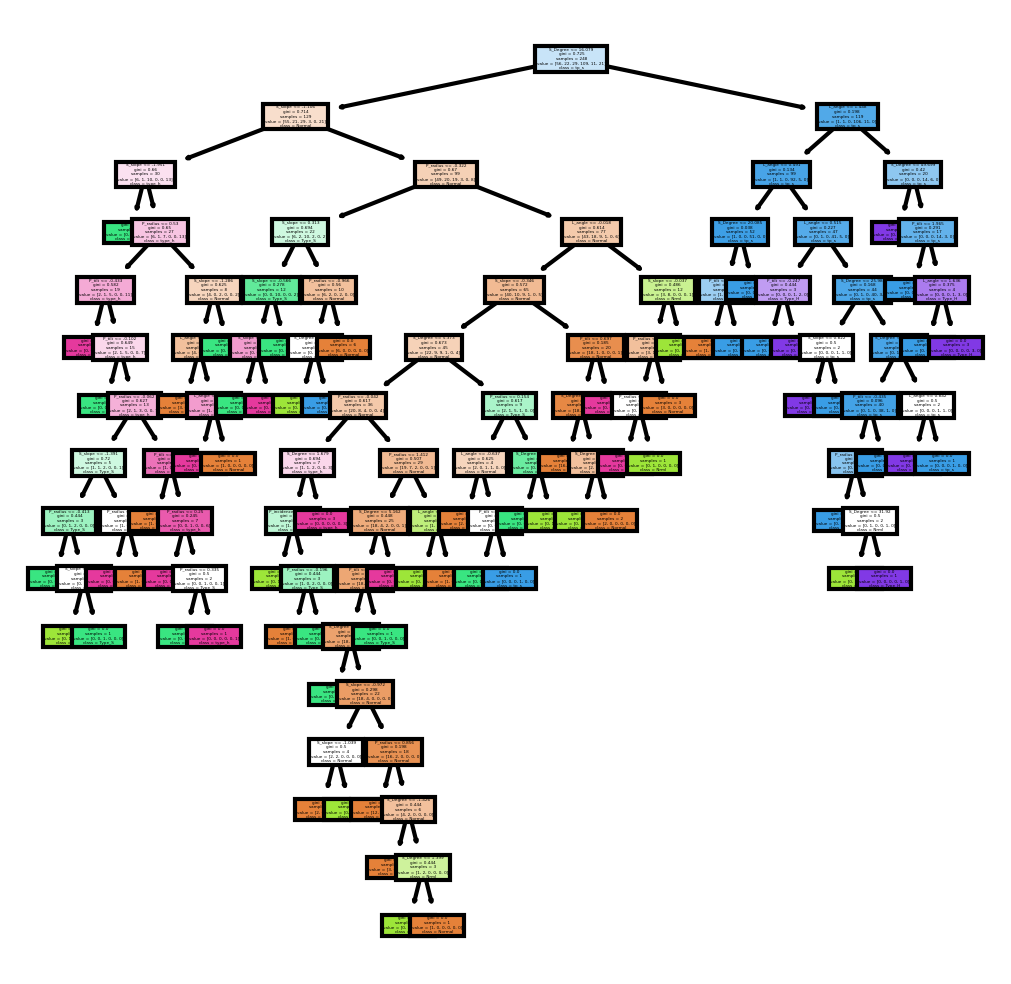

In [153]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(x_train)
cn = ["Normal","Nrml","Type_S" ,"tp_s","Type_H","type_h"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(tree_classifier, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

In [154]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=42)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.717741935483871
0.6290322580645161


Confusion Matrix:
[[10  1  4  1  0  1]
 [ 1  1  2  0  0  1]
 [ 0  2  1  1  0  4]
 [ 1  1  0 19  3  0]
 [ 0  0  0  6  0  0]
 [ 0  0  1  0  0  1]]


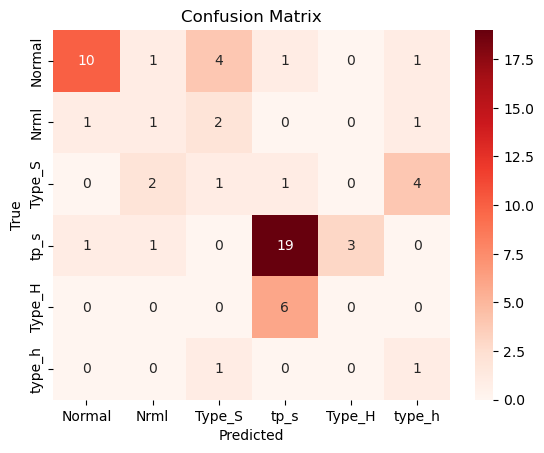

In [173]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = tree_classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=["Normal", "Nrml", "Type_S", "tp_s", "Type_H", "type_h"], yticklabels=["Normal", "Nrml", "Type_S", "tp_s", "Type_H", "type_h"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [165]:
print(len(y_test))
print(len(y_pred))

62
62
